In [1]:
!pip install fredapi

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\gjm10\appdata\local\programs\python\python311\lib\site-packages\tpqoa-0.0.56-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


## 1. 데이터 수집

* 069500.KS: KODEX 200 - KOSPI 200 지수 추종
* 232080.KS: Tiger KOSDAQ 150 ETF
* 143850.KS: TIGER S&P500 Futures ETF
* 195930.KS: Tiger Synth-Euro Stocks 50 ETF H
* 238720.ks: KINDEX Japan Nikkei225 ETF(H)
* 192090.KS: TIGER ChinaA300 ETF
* 148070.KS: KOSEF 10년 국채 - 한국 10년 국채 투자
* 136340.KS: KBSTAR KRX300 - 중기우량회사
* 182490.KS: TIGER 미국 채권 - TIGER 단기선진하이일드(합성H)
* 132030.KS: KODEX 골드 선물 - 금 선물 추종
* 130680.KS: TIGER WTI 원유 - WTI 원유 선물 추종
* 114800.KS: KODEX 인버스 - KOSPI 200 지수와 반대로 움직임
* 138230.KS: KOSEF 미국달러선물
* 139660.KS: KOSEF 미국달러선물인버스





In [2]:
import yfinance as yf
import pandas as pd
from fredapi import Fred
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# FRED API 키 설정
fred_api_key = '45cf71e3666ba3e38267b6477d920a60'
fred = Fred(api_key=fred_api_key)

# 티커 데이터 수집
tickers = ['069500.KS', '232080.KS', '143850.KS', '195930.KS', '238720.KS', '192090.KS',
            '148070.KS', '136340.KS', '182490.KS', '132030.KS', '130680.KS','114800.KS','138230.KS','139660.KS']
etf = yf.Tickers(tickers)
etf_data = etf.history(start='2017-01-01', actions=False)['Close'].resample('D').last()

# 거시경제적 지표 수집
gdp = fred.get_series('GDP', start='2017-01-01').resample('D').ffill()
unemployment = fred.get_series('UNRATE', start='2017-01-01').resample('D').ffill()
inflation = fred.get_series('CPIAUCSL', start='2017-01-01').resample('D').ffill()  # 소비자물가지수
interest_rate = fred.get_series('FEDFUNDS', start='2017-01-01').resample('D').ffill()
exchange_rate = fred.get_series('DEXKOUS', start='2017-01-01').resample('D').ffill()
consumer_sentiment = fred.get_series('UMCSENT', start='2017-01-01').resample('D').ffill()  # 소비자동향지수

dxy = yf.download('DX-Y.NYB', start='2017-01-01')['Close'].resample('D').ffill()  # 달러 인덱스
oil = yf.download('CL=F', start='2017-01-01')['Close'].resample('D').ffill()  # WTI 석유 가격
gold = yf.download('GC=F', start='2017-01-01')['Close'].resample('D').ffill()  # 금 가격

# 데이터 병합
macro_data = pd.concat([gdp,
                        unemployment,
                        inflation,
                        interest_rate,
                        exchange_rate,
                        consumer_sentiment,
                        #dxy,
                        oil,
                        gold], axis=1)
macro_data.columns = ['GDP',
                      'Unemployment',
                      'Inflation',
                      'Interest_Rate',
                      'Exchange_Rate',
                      'Consumer_Sentiment',
                      #'Dollar_Index',
                      'Oil_Price',
                      'Gold_Price']

# 결측값 처리
macro_data.fillna(method='ffill', inplace=True)
macro_data.fillna(method='bfill', inplace=True)

# 데이터 합치기
data = pd.concat([etf_data, macro_data], axis=1).dropna()

print(data.tail())  # 데이터 확인


[*****************     36%%                      ]  5 of 14 completed

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: Futu

[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  1 of 1 completed

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed
            069500.KS  114800.KS  130680.KS  132030.KS  136340.KS  138230.KS  \
2024-09-02    36260.0     4230.0     4335.0    15370.0   105685.0    14740.0   
2024-09-03    35955.0     4265.0     4365.0    15355.0   105675.0    14785.0   
2024-09-04    34705.0     4415.0     4145.0    15305.0   105755.0    14785.0   
2024-09-05    34650.0     4425.0     4105.0    15395.0   105845.0    14725.0   
2024-09-06    34340.0     4465.0     4110.0    15480.0   105880.0    14640.0   

            139660.KS  143850.KS  148070.KS  182490.KS  ...  232080.KS  \
2024-09-02     8825.0    61650.0   115450.0    13160.0  ...    13295.0   
2024-09-03     8800.0    61635.0   115365.0    13145.0  ...    13085.0   
2024-09-04     8795.0    60225.0   115875.0    13120.0  ...    12545.0   
2024-09-05     8830.0    60240.0   116245.0    13160.0  ...    12440.0   
2024-09-06     8890.0    59970.0   116430.0    13150.0  ...    12080.0   

    

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\gjm10\AppData\Local\Temp\ipykernel_20092\363531642.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macro_data.fillna(method='ffill', inplace=True)
C:\Users\gjm10\AppData\Local\Temp\ipykernel_20092\363531642.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macro_data.fillna(method='bfill', inplace=True)


### feature importance 확인하기

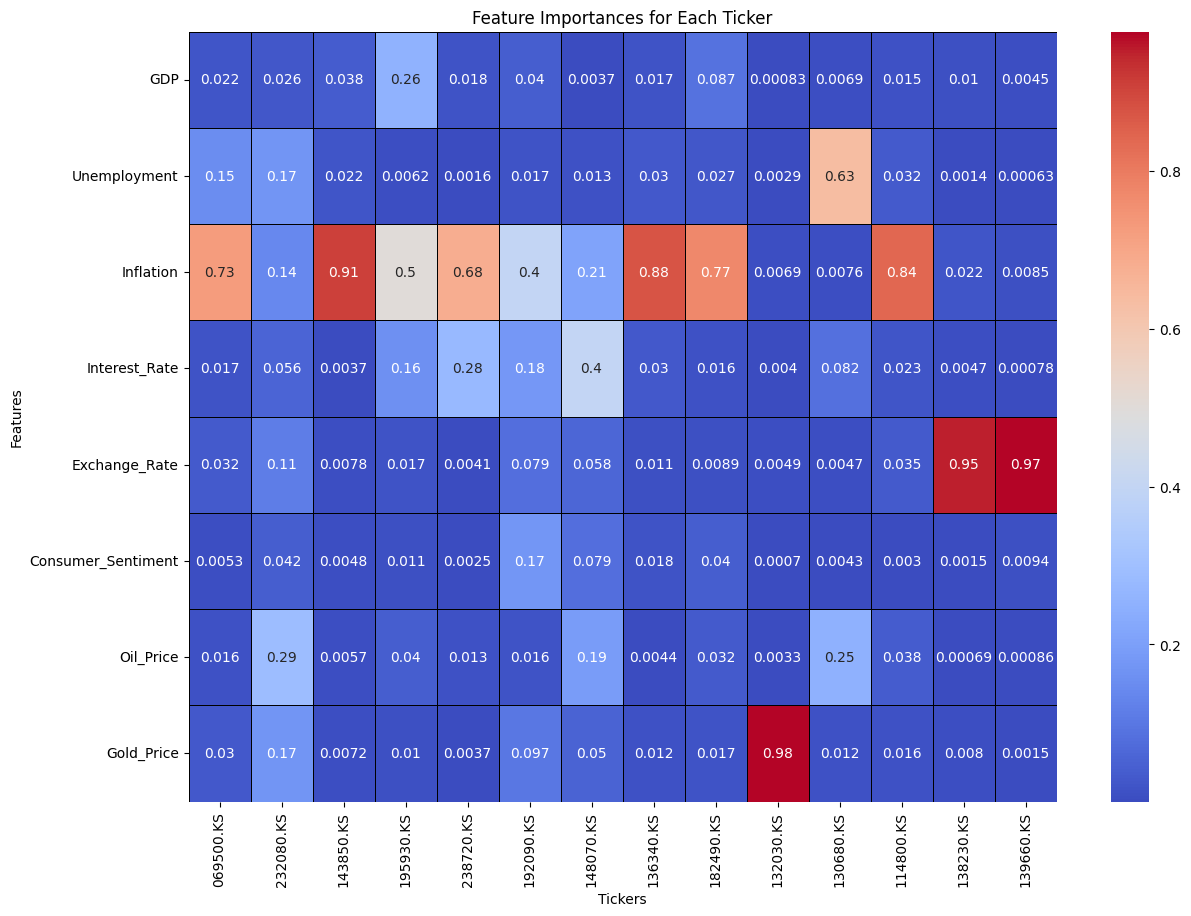

                    069500.KS  232080.KS  143850.KS  195930.KS  238720.KS  \
GDP                  0.021719   0.026062   0.037974   0.255964   0.018159   
Unemployment         0.151614   0.169024   0.022134   0.006182   0.001606   
Inflation            0.727191   0.139149   0.910680   0.500172   0.679389   
Interest_Rate        0.016572   0.055635   0.003721   0.159062   0.277514   
Exchange_Rate        0.032237   0.112770   0.007761   0.017173   0.004084   
Consumer_Sentiment   0.005300   0.042200   0.004763   0.011124   0.002477   
Oil_Price            0.015595   0.286776   0.005739   0.040263   0.013038   
Gold_Price           0.029772   0.168384   0.007227   0.010060   0.003733   

                    192090.KS  148070.KS  136340.KS  182490.KS  132030.KS  \
GDP                  0.039857   0.003745   0.017161   0.086796   0.000826   
Unemployment         0.017151   0.012762   0.030424   0.026581   0.002881   
Inflation            0.399185   0.208829   0.876423   0.772871   0.006856  

In [3]:
import seaborn as sns

# Normalize macroeconomic indicators
scaler = StandardScaler()
macro_data_scaled = pd.DataFrame(scaler.fit_transform(macro_data), index=macro_data.index, columns=macro_data.columns)

# Prepare feature importance extraction
feature_importances = {}

# Loop through each ticker and compute feature importances
for ticker in tickers:
    ticker_data = data[[ticker]].dropna()
    merged_data = pd.concat([ticker_data, macro_data_scaled], axis=1).dropna()

    X = merged_data.drop(columns=[ticker])
    y = merged_data[ticker]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    importances = model.feature_importances_
    feature_importances[ticker] = importances

# Display feature importance as a heatmap
importance_df = pd.DataFrame(feature_importances, index=macro_data.columns)
plt.figure(figsize=(14, 10))
sns.heatmap(importance_df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Feature Importances for Each Ticker')
plt.xlabel('Tickers')
plt.ylabel('Features')
plt.show()

# Print the feature importances
print(importance_df)

* 특정 feature에 영향을 많이 받는 ticker들이 다수 존재한다.

* Inflation (인플레이션):
    * 인플레이션은 대부분의 주식 종목에 큰 영향을 미치는 변수이다. 예를 들어, 143850.KS, 195930.KS, 182490.KS 등에서는 특히 높은 중요도를 보인다. (색상이 빨간색 또는 주황색에 가까움).
    * 이는 인플레이션이 해당 주식 종목의 변동성에 중요한 역할을 한다고 해석될 수 있다.

* Exchange Rate (환율):
    * 132030.KS와 139660.KS의 경우 환율이 매우 중요한 변수로 나타난다. 환율이 높을수록 해당 종목에 큰 영향을 미치고 있음을 알 수 있다.

* Oil Price (유가):
    * 132030.KS에서는 유가가 매우 중요한 변수로 나타났다.
    * 이는 해당 종목이 에너지나 원자재 가격 변동에 민감한 산업에 속할 수 있음을 보인다.

* Interest Rate (이자율):
    * 이자율은 대부분의 종목에서 낮은 중요도를 보이지만, 195930.KS와 182490.KS에서 상대적으로 더 중요한 변수로 나타난다.

* GDP:
    * 전반적으로 GDP는 중요도가 낮은 편이지만, 148070.KS와 132030.KS에서 약간 높은 중요도를 보인다.

* Consumer Sentiment (소비자 심리):
    * 소비자 심리 지표는 대부분의 주식 종목에서 중요도가 낮게 나타난다.

### 시계열 분석

C:\Users\gjm10\AppData\Local\Temp\ipykernel_20092\4251051269.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').mean()


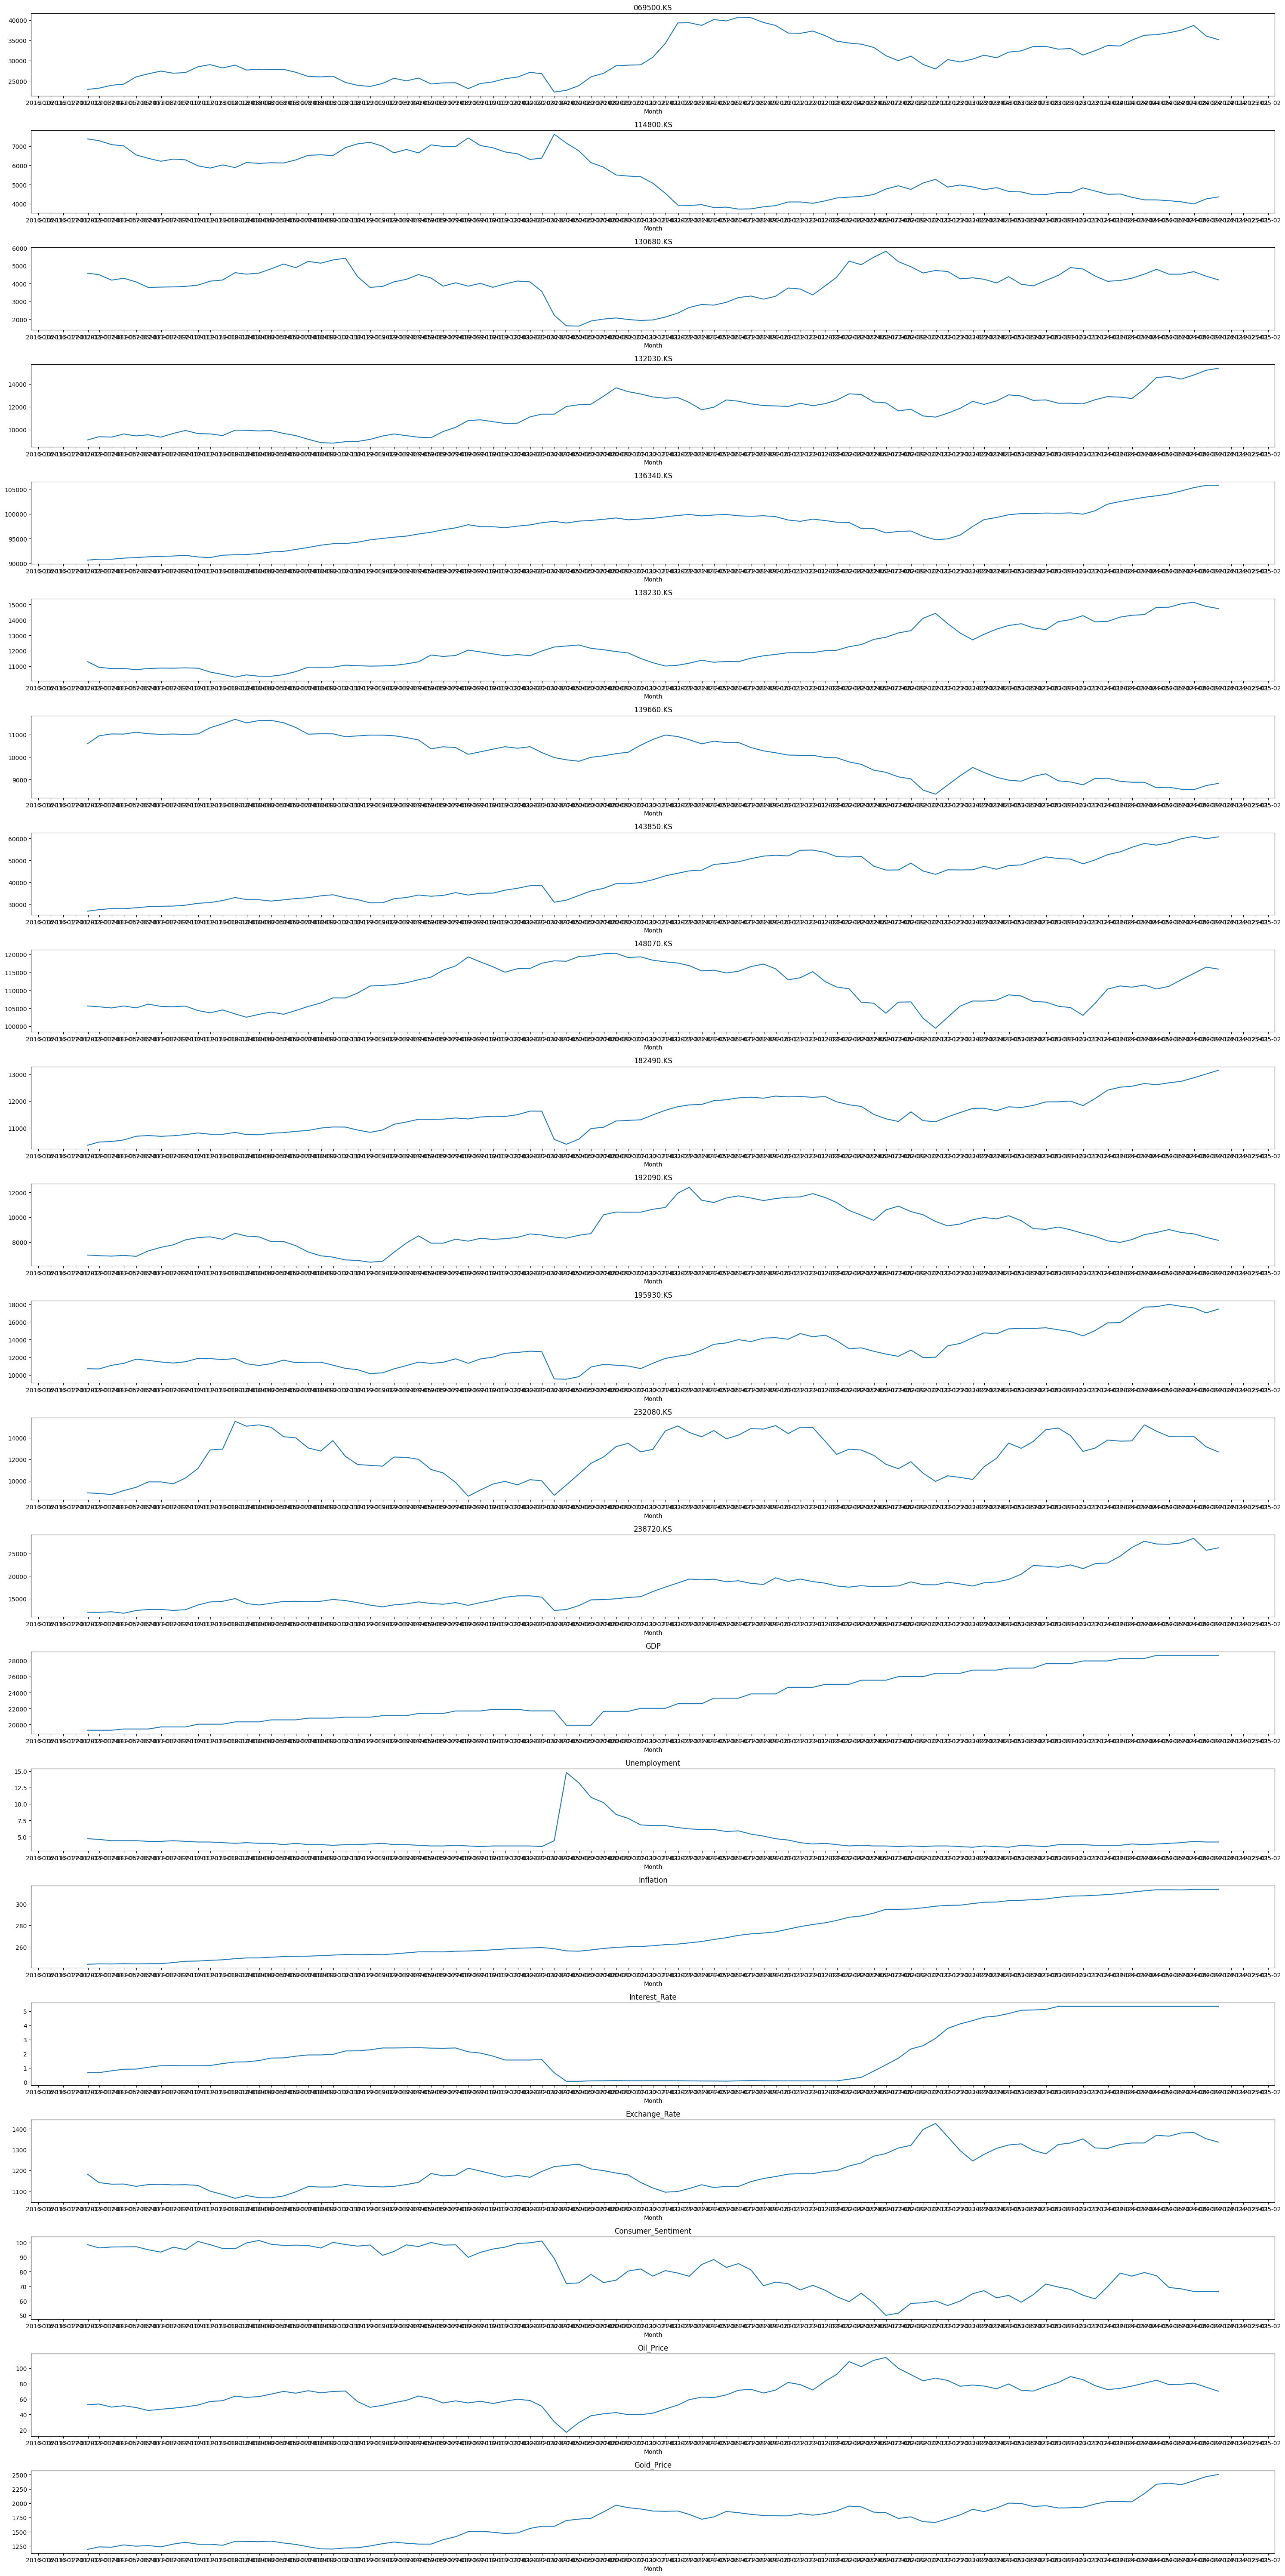

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates

# 데이터 시각화
def plot_time_series_monthly(data, columns):
    data_monthly = data.resample('M').mean()
    plt.figure(figsize=(30, 60))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        plt.plot(data_monthly.index, data_monthly[col])
        plt.title(col)
        plt.xlabel('Month')
        plt.xlabel.rotate = 90
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.tight_layout()
    plt.show()

# 데이터 시각화
plot_time_series_monthly(data, data.columns)

In [5]:
# ADF 테스트 함수
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Values {key}: {value}')
    print()

# 차분 후 ADF 테스트 함수
def difference_adf_test(series, title=''):
    diff_series = series.diff().dropna()
    adf_test(diff_series, title + ' (1st Difference)')
    return diff_series

# 원 데이터 ADF 테스트
adf_results = {}
for column in data.columns:
    adf_results[column] = adf_test(data[column], column)

ADF Test: 069500.KS
ADF Statistic: -1.6463572587187185
p-value: 0.45894090791588565
Critical Values 1%: -3.43389351006096
Critical Values 5%: -2.8631052612824286
Critical Values 10%: -2.5676032900550028

ADF Test: 114800.KS
ADF Statistic: -1.6240136849780533
p-value: 0.4706257112955567
Critical Values 1%: -3.4338858460442006
Critical Values 5%: -2.8631018778892563
Critical Values 10%: -2.567601488519795

ADF Test: 130680.KS
ADF Statistic: -1.9969911946284156
p-value: 0.2878939118114766
Critical Values 1%: -3.4338954312591943
Critical Values 5%: -2.8631061094223527
Critical Values 10%: -2.567603741659238

ADF Test: 132030.KS
ADF Statistic: -0.7816019413516817
p-value: 0.8244667133272989
Critical Values 1%: -3.4338725134861083
Critical Values 5%: -2.863095992014326
Critical Values 10%: -2.5675983545064196

ADF Test: 136340.KS
ADF Statistic: 0.1597341674317498
p-value: 0.9699105974214768
Critical Values 1%: -3.4338896739040923
Critical Values 5%: -2.863103567755513
Critical Values 10%: -2

ADF 테스트는 주어진 시계열 데이터가 정상성(stationarity)을 가지는지 여부를 판단하는 통계 테스트
* 해석
    * ADF 통계량 -> 음수일수록 데이터 정상성을 가지는 것에 대한 증거 강해짐
    * p-value ->  p-값이 0.05 이하이면 귀무가설(데이터가 비정상성이다)을 기각
    * Critical values 유의 수준 -> 이 값들은 다양한 유의 수준(1%, 5%, 10%)에서의 임계값입니다. ADF 통계량이 이 임계값보다 낮으면 귀무가설을 기각

* 결과
    * ETF 데이터와 거시경제 지표
    * 전부 비정상성을 띄고 있다 따라서 차분을 통해 정상성을 맞추고자 한다.

In [6]:
# 차분 후 ADF 테스트 함수
def difference_adf_test(series, title=''):
    diff_series = series.diff().dropna()
    adf_test(diff_series, title + ' (1st Difference)')
    return diff_series

# 차분 후 ADF 테스트
diff_data = pd.DataFrame()
for column in data.columns:
    diff_data[column] = difference_adf_test(data[column], column)

ADF Test: 069500.KS (1st Difference)
ADF Statistic: -13.21653099376448
p-value: 1.021803712796066e-24
Critical Values 1%: -3.43389351006096
Critical Values 5%: -2.8631052612824286
Critical Values 10%: -2.5676032900550028

ADF Test: 114800.KS (1st Difference)
ADF Statistic: -9.796960816535
p-value: 6.137883047772236e-17
Critical Values 1%: -3.433922548448764
Critical Values 5%: -2.863118080628251
Critical Values 10%: -2.567610115908591

ADF Test: 130680.KS (1st Difference)
ADF Statistic: -12.076463606834231
p-value: 2.2841368246230633e-22
Critical Values 1%: -3.4338954312591943
Critical Values 5%: -2.8631061094223527
Critical Values 10%: -2.567603741659238

ADF Test: 132030.KS (1st Difference)
ADF Statistic: -43.650454790722996
p-value: 0.0
Critical Values 1%: -3.433874411978076
Critical Values 5%: -2.8630968301361275
Critical Values 10%: -2.567598800775398

ADF Test: 136340.KS (1st Difference)
ADF Statistic: -11.272953767572476
p-value: 1.5208768602348764e-20
Critical Values 1%: -3.433

C:\Users\gjm10\AppData\Local\Temp\ipykernel_20092\4251051269.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').mean()


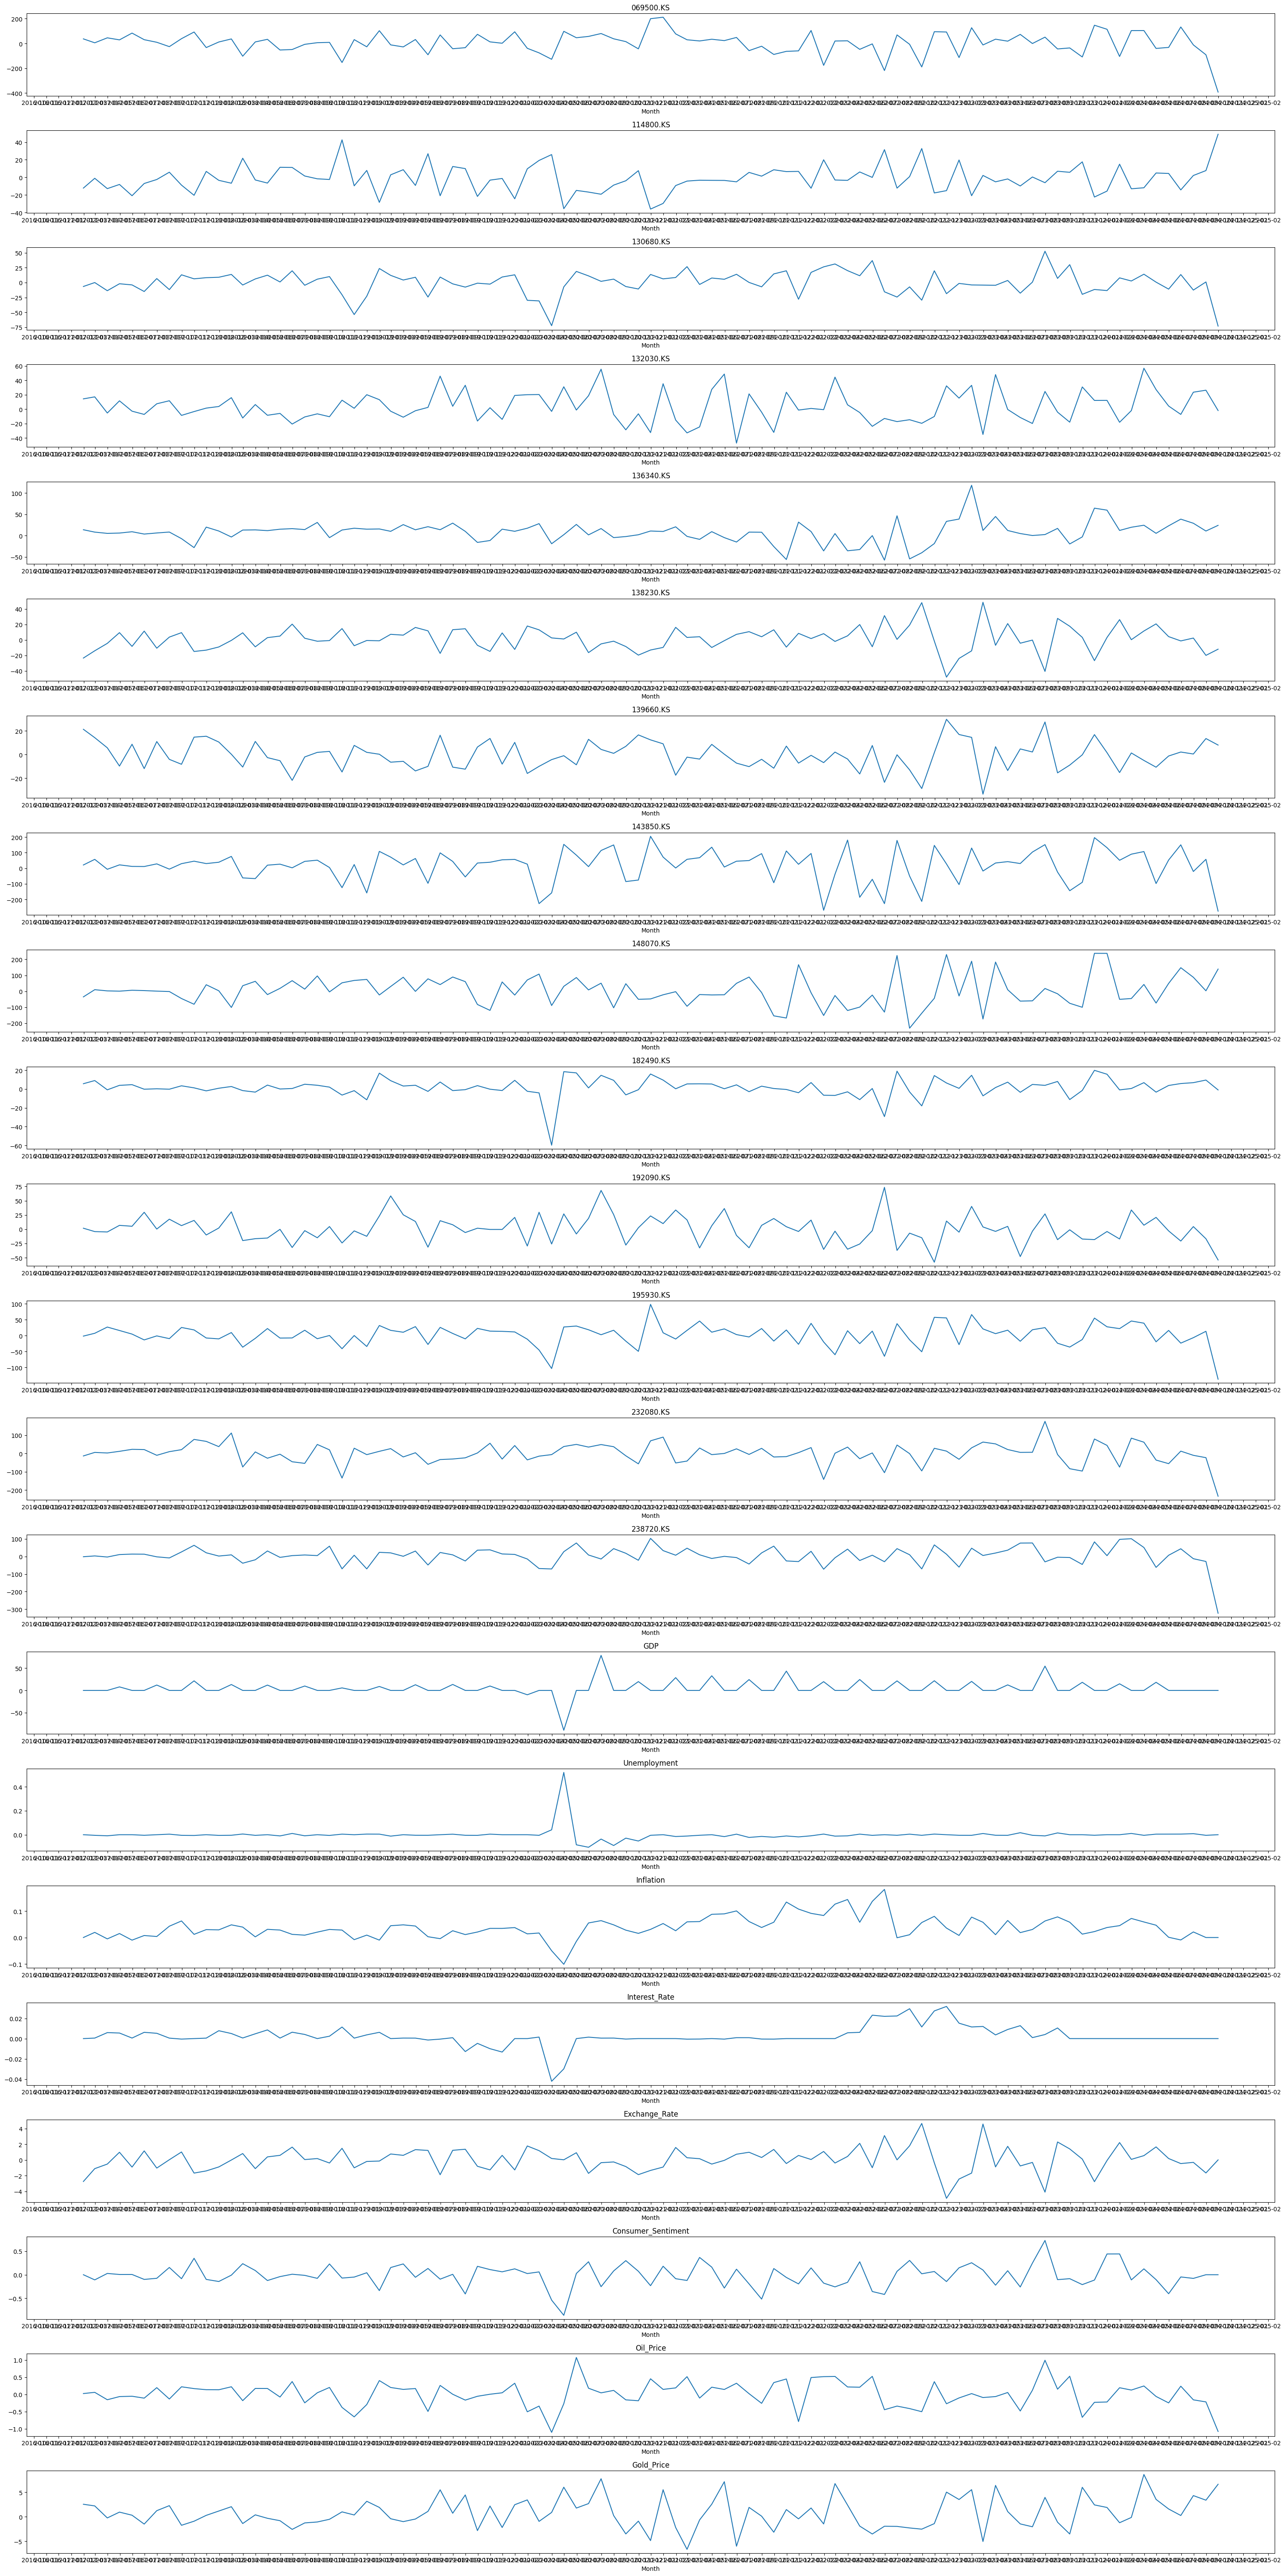

In [7]:
 # 차분된 데이터 시각화
plot_time_series_monthly(diff_data, diff_data.columns)

## 피드백
* 거시경제 + 장 흐름을 반영할 수 있는 지표들 (달러 인덱스, 석유, 수출수익 지수 ??, 원자재 가격 ...  ...)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 2017-01-02 to 2024-09-06
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   069500.KS           1860 non-null   float64
 1   114800.KS           1860 non-null   float64
 2   130680.KS           1860 non-null   float64
 3   132030.KS           1860 non-null   float64
 4   136340.KS           1860 non-null   float64
 5   138230.KS           1860 non-null   float64
 6   139660.KS           1860 non-null   float64
 7   143850.KS           1860 non-null   float64
 8   148070.KS           1860 non-null   float64
 9   182490.KS           1860 non-null   float64
 10  192090.KS           1860 non-null   float64
 11  195930.KS           1860 non-null   float64
 12  232080.KS           1860 non-null   float64
 13  238720.KS           1860 non-null   float64
 14  GDP                 1860 non-null   float64
 15  Unemployment        1860 non-null   f

## 2. 데이터 전처리

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 정규화
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = data[macro_data.columns]  # 거시경제적 지표
y = data[tickers]  # 티커의 투자 비율

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 시계열 데이터 셋 만들기
def create_sequences(X, y, time_steps=8):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 24
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# 데이터셋 분할을 위해 인덱스 생성
index_dates = data.index[time_steps:]  # 시계열 데이터를 생성한 후의 인덱스

# 연도별 데이터 분할
train_indices = index_dates.year < 2022
val_indices = (index_dates.year >= 2022) & (index_dates.year < 2024)
test_indices = index_dates.year >= 2024

# 훈련 데이터셋
X_train = X_seq[train_indices]
y_train = y_seq[train_indices]

# 검증 데이터셋
X_val = X_seq[val_indices]
y_val = y_seq[val_indices]

# 테스트 데이터셋
X_test = X_seq[test_indices]
y_test = y_seq[test_indices]

# 확인
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (1196, 24, 8), y_train shape: (1196, 14)
X_val shape: (472, 24, 8), y_val shape: (472, 14)
X_test shape: (168, 24, 8), y_test shape: (168, 14)


## 3. 모델 설계 학습

```
model = build_model(
    input_shape,
    head_size=256,  # Increased head size
    num_heads=8,  # Increased number of heads
    ff_dim=128,  # Increased feed-forward network dimension
    num_transformer_blocks=6,  # Increased number of transformer blocks
    mlp_units=[256, 128],  # Added another MLP layer and increased dimensions
    mlp_dropout=0.4,
    dropout=0.3,  # Increased dropout

    epoch = 500,
    batch_size = 32
)
-> 성능 잘 안 나옴
```

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, Flatten, MultiHeadAttention, Add, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = LayerNormalization(epsilon=1e-6)(x)
    x = Flatten()(x)
    x = Dropout(mlp_dropout)(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu", kernel_regularizer='l2')(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(len(tickers), activation="linear")(x)
    return Model(inputs, outputs)

input_shape = X_train.shape[1:]
model = build_model(
    input_shape,
    head_size=128,  # Reduced head size
    num_heads=4,  # Reduced number of heads
    ff_dim=64,  # Reduced feed-forward network dimension
    num_transformer_blocks=4,  # Reduced number of transformer blocks
    mlp_units=[128, 64],  # Reduced dimensions
    mlp_dropout=0.5,  # Increased dropout
    dropout=0.4,  # Increased dropout
)

Epoch 1/300

75/75 [==============================] - 7s 27ms/step - loss: 6.5354 - val_loss: 3.3220 - lr: 1.0000e-04
Epoch 2/300
75/75 [==============================] - 2s 23ms/step - loss: 4.8262 - val_loss: 3.2286 - lr: 1.0000e-04
Epoch 3/300
75/75 [==============================] - 2s 21ms/step - loss: 4.1277 - val_loss: 3.2082 - lr: 1.0000e-04
Epoch 4/300
75/75 [==============================] - 2s 20ms/step - loss: 3.7958 - val_loss: 3.2144 - lr: 1.0000e-04
Epoch 5/300
75/75 [==============================] - 2s 21ms/step - loss: 3.5851 - val_loss: 3.2240 - lr: 1.0000e-04
Epoch 6/300
75/75 [==============================] - 2s 20ms/step - loss: 3.4749 - val_loss: 3.2142 - lr: 1.0000e-04
Epoch 7/300
75/75 [==============================] - 2s 23ms/step - loss: 3.3862 - val_loss: 3.2260 - lr: 1.0000e-04
Epoch 8/300
75/75 [==============================] - 1s 20ms/step - loss: 3.2894 - val_loss: 3.2134 - lr: 1.0000e-04
Epoch 9/300
75/75 [==============================] - 2s 20ms/st

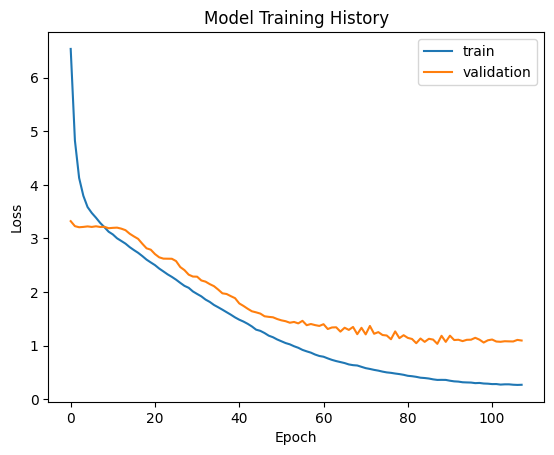

In [11]:
# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Adam optimizer with learning rate warm-up
optimizer = Adam(learning_rate=1e-4)

# Model compile
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Model training
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,  # Reduced batch size
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[early_stopping, reduce_lr]
)

# Training history visualization
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training History')
plt.show()

Epoch 1/500
68/68 [==============================] - 9s 27ms/step - loss: 0.9633 - val_loss: 0.6437
Epoch 2/500
68/68 [==============================] - 1s 11ms/step - loss: 0.9446 - val_loss: 0.6278
Epoch 3/500
68/68 [==============================] - 1s 11ms/step - loss: 0.9246 - val_loss: 0.6133
Epoch 4/500
68/68 [==============================] - 1s 11ms/step - loss: 0.9057 - val_loss: 0.5999
Epoch 5/500
68/68 [==============================] - 1s 11ms/step - loss: 0.8891 - val_loss: 0.5876
Epoch 6/500
68/68 [==============================] - 1s 11ms/step - loss: 0.8685 - val_loss: 0.5758
Epoch 7/500
68/68 [==============================] - 1s 11ms/step - loss: 0.8570 - val_loss: 0.5641
Epoch 8/500
68/68 [==============================] - 1s 11ms/step - loss: 0.8406 - val_loss: 0.5532
Epoch 9/500
68/68 [==============================] - 1s 14ms/step - loss: 0.8207 - val_loss: 0.5428
Epoch 10/500
68/68 [==============================] - 1s 15ms/step - loss: 0.8080 - val_loss: 0.5327

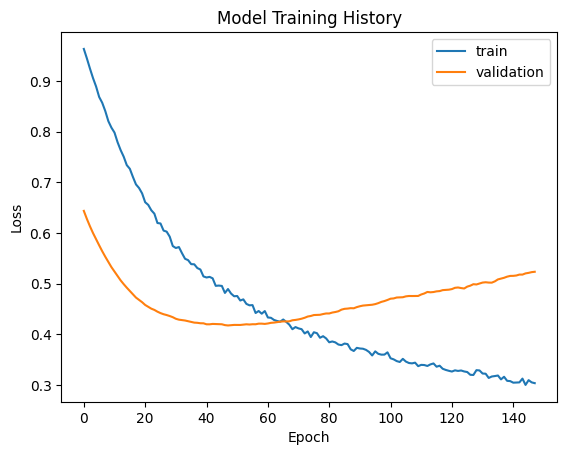

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# # GRU 모델 설계
# model = Sequential()
# model.add(GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.4))
# model.add(GRU(64, return_sequences=True))
# model.add(Dropout(0.4))
# model.add(GRU(64, return_sequences=True))
# model.add(Dropout(0.4))
# model.add(GRU(32, return_sequences=False))
# model.add(Dropout(0.4))
# model.add(Dense(len(tickers), activation='linear'))

# # 학습률 설정
# learning_rate = 0.00001

# # Adam 옵티마이저 생성
# optimizer = Adam(learning_rate=learning_rate)

# # 모델 컴파일
# model.compile(optimizer=optimizer, loss='mean_squared_error')

# # 조기 종료 콜백 설정
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# # 모델 학습
# history = model.fit(
#     X_train, y_train,
#     epochs=500,
#     batch_size=16,
#     validation_data=(X_val, y_val),
#     shuffle=False,
#     callbacks=[early_stopping]
# )

# # 학습 결과 시각화
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Model Training History')
# plt.show()

## 4. 모델 예측
* input -> 거시경제 지표
* output -> 각 ETF 투자 비율

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_test and y_test are already prepared and scaled
# Let's define the scaler for the target values if not defined
scaler_y = StandardScaler()
scaler_y.fit(y_train)

y_pred = model.predict(X_test)

# 데이터 형태 확인
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_pred shape: {y_pred.shape}')

# 예측값 역정규화
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_pred_unscaled = scaler_y.inverse_transform(y_pred)

# 티커별 제약 조건 설정
bounds = {
    '069500.KS': (0, 40),
    '232080.KS': (0, 20),
    '143850.KS': (0, 20),
    '195930.KS': (0, 20),
    '238720.KS': (0, 20),
    '192090.KS': (0, 20),
    '148070.KS': (0, 50),
    '136340.KS': (0, 40),
    #'182490.KS': (5, 40),
    # bound 범위 바꿔서 다시 실행해보기 ex 0, 20
    '132030.KS': (0, 15),
    '130680.KS': (0, 15),
    '114800.KS': (0, 20),
    '138230.KS': (0, 20),
    '139660.KS': (0, 20)
}

# 제약 조건 적용 함수
def apply_constraints(predictions, bounds):
    constrained_predictions = np.zeros_like(predictions)
    for i, col in enumerate(bounds.keys()):
        min_bound, max_bound = bounds[col]
        constrained_predictions[:, i] = np.clip(predictions[:, i], min_bound, max_bound)
    return constrained_predictions

# 예측값을 100%로 정규화하는 함수
def normalize_to_100(predictions):
    normalized_predictions = np.zeros_like(predictions)
    for i in range(predictions.shape[0]):
        total = np.sum(predictions[i])
        if total > 0:
            normalized_predictions[i] = (predictions[i] / total) * 100
    return normalized_predictions

# 예측값을 0과 1 사이로 스케일링
y_pred_scaled = (y_pred_unscaled - y_pred_unscaled.min()) / (y_pred_unscaled.max() - y_pred_unscaled.min())

# 제약 조건 적용
y_pred_constrained = apply_constraints(y_pred_scaled, bounds)

# 제약 조건 적용 후 0이 아닌 최소값을 0.01로 설정
# y_pred_constrained[y_pred_constrained == 0] = 0.01

# 예측값 정규화
y_pred_normalized = normalize_to_100(y_pred_constrained)

# 결과를 DataFrame으로 변환
results_constrained = pd.DataFrame(y_pred_normalized, columns=tickers)

# 결과 저장
results_constrained.to_csv('investment_predictions_constrained_transformer_0908.csv', index=False)

print(results_constrained.head())


6/6 [==============================] - 0s 8ms/step
X_test shape: (168, 24, 8)
y_test shape: (168, 14)
y_pred shape: (168, 14)
   069500.KS  232080.KS  143850.KS  195930.KS  238720.KS  192090.KS  \
0   5.326293   6.105583   3.304126   4.168709   4.320522   8.784616   
1   5.165126   5.945561   3.220556   4.143187   4.296749   8.651918   
2   4.994061   5.792706   3.132782   4.122908   4.272077   8.498429   
3   4.752364   5.584410   3.002922   4.090426   4.234025   8.305796   
4   4.540378   5.402649   2.890960   4.050262   4.204330   8.131221   

   148070.KS  136340.KS  182490.KS  132030.KS  130680.KS  114800.KS  \
0  20.351578   8.704875   6.664626   4.519844   4.453666  19.667068   
1  20.510366   8.734016   6.639567   4.473022   4.553926  20.002974   
2  20.655109   8.765016   6.612573   4.419289   4.669329  20.362686   
3  20.877384   8.808806   6.576876   4.352884   4.801442  20.851343   
4  21.065912   8.847321   6.553407   4.282749   4.915674  21.308592   

   138230.KS  139660

In [13]:
print(results_constrained.tail())

     069500.KS  232080.KS  143850.KS  195930.KS  238720.KS  192090.KS  \
163   9.947556  10.372273   5.493434   4.503663   4.607128  13.448914   
164  10.036787  10.430634   5.522691   4.514243   4.614552  13.501009   
165  10.113813  10.481535   5.550327   4.516301   4.619479  13.556555   
166  10.182149  10.526521   5.575996   4.525468   4.626728  13.603369   
167  10.209823  10.546244   5.584273   4.521811   4.626595  13.630719   

     148070.KS  136340.KS  182490.KS  132030.KS  130680.KS  114800.KS  \
163  17.484539   8.253372   7.179300   6.598065   0.070266   9.498693   
164  17.402765   8.239073   7.196621   6.600895   0.062792   9.358477   
165  17.345554   8.232323   7.209056   6.609471   0.036907   9.230927   
166  17.284298   8.226912   7.220744   6.607778   0.026410   9.116559   
167  17.277880   8.229935   7.220758   6.615852   0.000000   9.067278   

     138230.KS  139660.KS  
163   2.542794        0.0  
164   2.519458        0.0  
165   2.497751        0.0  
166   2.47

* TIGER 단기선진하이일드(합성 H) 이 티커에 코너해 되는 경향이 있어서 제외하고 모델 학습시킴.
* 이후 제약조건 맞게 배치 되는 것 같아서 소숫점들에 대해서 해외채권 5% 최소 비중 넣으면 어떨까


In [17]:
import pandas as pd

# 파일 경로 설정
file_path = 'investment_predictions_constrained_transformer_0908.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path, index_col=0)

# ETF 가격 데이터
print(data.head())

# 각 날짜에 대해 포트폴리오의 총 가치 계산 (주식 수를 1로 가정)
portfolio_values = data.sum(axis=1)

# 투자 비율 계산 (각 ETF 가격을 포트폴리오 총 가치로 나눔)
investment_ratios = data.div(portfolio_values, axis=0)

# 결과 확인
print(investment_ratios.head())

# 백분율로 변환하여 저장
investment_ratios_percentage = investment_ratios * 100
investment_ratios_percentage.to_csv('investment_ratios_percentage_0908.csv')

print("CSV 파일로 저장 완료: investment_ratios_percentage_0908.csv")


           232080.KS  143850.KS  195930.KS  238720.KS  192090.KS  148070.KS  \
069500.KS                                                                     
5.326293    6.105583   3.304126   4.168709   4.320522   8.784615  20.351578   
5.165126    5.945561   3.220556   4.143187   4.296749   8.651918  20.510366   
4.994061    5.792706   3.132782   4.122908   4.272077   8.498429  20.655110   
4.752364    5.584410   3.002922   4.090426   4.234025   8.305796  20.877384   
4.540378    5.402649   2.890960   4.050262   4.204330   8.131221  21.065912   

           136340.KS  182490.KS  132030.KS  130680.KS  114800.KS  138230.KS  \
069500.KS                                                                     
5.326293    8.704875   6.664626   4.519844   4.453666  19.667068   3.628500   
5.165126    8.734016   6.639567   4.473021   4.553927  20.002974   3.663032   
4.994061    8.765016   6.612573   4.419289   4.669329  20.362686   3.703022   
4.752364    8.808806   6.576876   4.352884   4.8014

### 하이퍼파라미터 튜닝 part
0. learning_rate
1. 거시경제 지표 몇개년 사용할지
2. epoch, batch_size
3. dropout 비율
4. normalizaition
5. 초기화 방식
6. 시계열 길이 -> 더 긴 시계열 패턴

In [18]:
print(investment_ratios.tail(10))

           232080.KS  143850.KS  195930.KS  238720.KS  192090.KS  148070.KS  \
069500.KS                                                                     
9.447105    0.111135   0.058700   0.049075   0.050263   0.145475   0.198316   
9.543640    0.111927   0.059086   0.049249   0.050411   0.146229   0.197591   
9.666911    0.112939   0.059649   0.049519   0.050655   0.147095   0.196486   
9.765145    0.113733   0.060129   0.049726   0.050847   0.147800   0.195611   
9.870711    0.114537   0.060657   0.049901   0.051038   0.148654   0.194736   
9.947556    0.115180   0.061003   0.050012   0.051161   0.149345   0.194160   
10.036787   0.115943   0.061388   0.050179   0.051294   0.150073   0.193443   
10.113813   0.116609   0.061748   0.050245   0.051393   0.150819   0.192972   
10.182149   0.117199   0.062081   0.050385   0.051512   0.151455   0.192437   
10.209823   0.117454   0.062192   0.050360   0.051527   0.151806   0.192425   

           136340.KS  182490.KS  132030.KS  130680.

1. 주간 데이터로 사용할 때
* 데이터셋이 너무 적어서 과적합 일어남
* dropout, earlystop, shuffle, batch_size, learning_rate 조정
-> 제대로 학습 이뤄지지 않음 + output에 대한 타당성 없음

2. 주간 -> 일간 데이터 사용
* 데이터셋을 더 늘리기 위해서 주간에서 일간으로 바꿈
* 각각 하이퍼파라미터 조정을 통해서 loss 줄이기 위한 과정 진행
* val_loss 0.4 이하로 떨어지지 않음


### 수익률을 통한 평가

수익률은 ((오늘 종가 - 어제 종가) / 어제 종가) * 100

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 예측된 주가 데이터 (y_pred_unscaled)와 실제 주가 데이터 (y_test_unscaled) 사용
# y_pred_unscaled와 y_test_unscaled는 모델 예측 값과 실제 값으로, 역정규화된 값이어야 합니다.

# 수익률 계산 함수
def calculate_returns(prices):
    returns = (prices[1:] - prices[:-1]) / prices[:-1]
    return returns

# 실제 수익률 계산
actual_returns = pd.DataFrame(y_test_unscaled, columns=tickers).pct_change().dropna()

# 예측 수익률 계산
predicted_returns = pd.DataFrame(y_pred_unscaled, columns=tickers).pct_change().dropna()

# 성능 평가 지표 계산 함수
def evaluate_performance(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# 각 티커별로 성능 평가
performance_metrics = {}
for ticker in tickers:
    actual = actual_returns[ticker].values
    predicted = predicted_returns[ticker].values
    mae, mse, rmse = evaluate_performance(actual, predicted)
    performance_metrics[ticker] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

# 성능 평가 결과 출력
performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)

# 평균 성능 평가 결과 출력
average_mae = performance_df['MAE'].mean()
average_mse = performance_df['MSE'].mean()
average_rmse = performance_df['RMSE'].mean()

print(f'Average MAE: {average_mae}')
print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')


                MAE        MSE      RMSE
069500.KS  0.180925   0.208945  0.457105
232080.KS  0.287402   0.526713  0.725750
143850.KS  0.037855   0.002566  0.050651
195930.KS  0.054380   0.005809  0.076215
238720.KS  0.066100   0.034419  0.185525
192090.KS  0.348054   3.470153  1.862835
148070.KS  0.168527   0.119050  0.345036
136340.KS  0.017467   0.000450  0.021222
182490.KS  0.038556   0.002515  0.050153
132030.KS  0.064365   0.009417  0.097039
130680.KS  1.321741  50.521190  7.107826
114800.KS  0.061065   0.007771  0.088154
138230.KS  0.992261  93.067830  9.647167
139660.KS  0.142646   0.101064  0.317906
Average MAE: 0.2700961504727576
Average MSE: 10.57699216286816
Average RMSE: 1.5023273071938263


* 130680.KS: TIGER WTI 원유 - WTI 원유 선물 추종
* 138230.KS: KOSEF 미국달러선물

이 두 ticker에 대해서 높은 MAE MSE값을 보임.

### 결과 바탕으로 백테스팅 진행

In [20]:
import pandas as pd

# 예측된 투자 비중 데이터 로드
results_constrained = pd.read_csv('investment_predictions_constrained_transformer_0908.csv', index_col=0)

# 데이터 확인
print(results_constrained.head())

           232080.KS  143850.KS  195930.KS  238720.KS  192090.KS  148070.KS  \
069500.KS                                                                     
5.326293    6.105583   3.304126   4.168709   4.320522   8.784615  20.351578   
5.165126    5.945561   3.220556   4.143187   4.296749   8.651918  20.510366   
4.994061    5.792706   3.132782   4.122908   4.272077   8.498429  20.655110   
4.752364    5.584410   3.002922   4.090426   4.234025   8.305796  20.877384   
4.540378    5.402649   2.890960   4.050262   4.204330   8.131221  21.065912   

           136340.KS  182490.KS  132030.KS  130680.KS  114800.KS  138230.KS  \
069500.KS                                                                     
5.326293    8.704875   6.664626   4.519844   4.453666  19.667068   3.628500   
5.165126    8.734016   6.639567   4.473021   4.553927  20.002974   3.663032   
4.994061    8.765016   6.612573   4.419289   4.669329  20.362686   3.703022   
4.752364    8.808806   6.576876   4.352884   4.8014

In [21]:
import yfinance as yf

# ETF 티커 목록
tickers = ['069500.KS', '232080.KS', '143850.KS', '195930.KS', '271050.KS', '192090.KS',
           '148070.KS', '136340.KS', '182490.KS', '132030.KS', '130680.KS', '114800.KS',
           '138230.KS', '139660.KS']

# 가격 데이터를 가져올 기간 설정
start_date = '2024-06-01'
end_date = '2024-09-08'

# yfinance를 사용하여 ETF 가격 데이터 가져오기
etf_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# 데이터 확인
print(etf_data.head())


[**********************64%%*****                 ]  9 of 14 completed

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: Futu

[*********************100%%**********************]  14 of 14 completed
               069500.KS  114800.KS  130680.KS  132030.KS      136340.KS  \
Date                                                                       
2024-06-03  36515.593750     4210.0     4425.0    14395.0  104201.273438   
2024-06-04  36246.656250     4240.0     4260.0    14600.0  104275.507812   
2024-06-05  36610.218750     4200.0     4230.0    14490.0  104369.554688   
2024-06-07  37093.308594     4150.0     4340.0    14745.0  104473.492188   
2024-06-10  36769.589844     4190.0     4355.0    14230.0  104349.757812   

            138230.KS  139660.KS  143850.KS  148070.KS  182490.KS  192090.KS  \
Date                                                                           
2024-06-03    14955.0     8590.0    58545.0   111245.0    12655.0     8905.0   
2024-06-04    14985.0     8590.0    58420.0   111850.0    12685.0     8930.0   
2024-06-05    14940.0     8610.0    58605.0   112200.0    12690.0     8890.0

            Portfolio Value
Date                       
2024-06-03              NaN
2024-06-04              NaN
2024-06-05              NaN
2024-06-07              NaN
2024-06-10              NaN
...                     ...
2024-09-02              NaN
2024-09-03              NaN
2024-09-04              NaN
2024-09-05              NaN
2024-09-06              NaN

[67 rows x 1 columns]
            Portfolio Value  Daily Return
Date                                     
2024-06-03              NaN           NaN
2024-06-04              NaN           NaN
2024-06-05              NaN           NaN
2024-06-07              NaN           NaN
2024-06-10              NaN           NaN
...                     ...           ...
2024-09-02              NaN           NaN
2024-09-03              NaN           NaN
2024-09-04              NaN           NaN
2024-09-05              NaN           NaN
2024-09-06              NaN           NaN

[67 rows x 2 columns]


C:\Users\gjm10\AppData\Local\Temp\ipykernel_20092\2596336110.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  portfolio_values['Daily Return'] = portfolio_values['Portfolio Value'].pct_change()


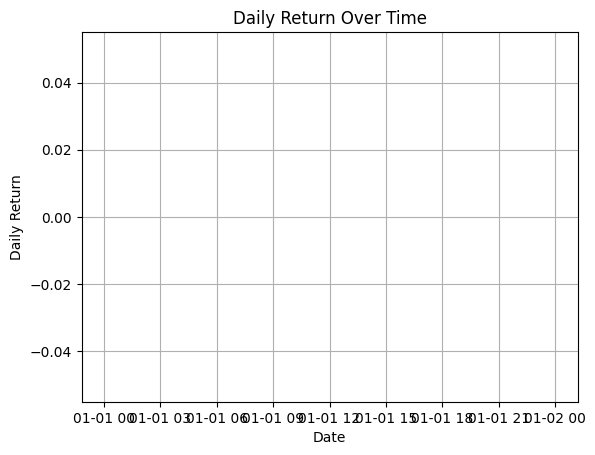

In [22]:
def backtest_portfolio(allocations, price_data, initial_value=10000000000):
    """
    백테스팅 함수
    :param allocations: 예측된 투자 비중 데이터프레임
    :param price_data: 실제 ETF 가격 데이터프레임
    :param initial_value: 초기 포트폴리오 가치
    :return: 포트폴리오 가치 시계열 데이터프레임
    """
    # 포트폴리오 가치 시계열 데이터프레임 초기화
    portfolio_values = pd.DataFrame(index=price_data.index)
    portfolio_values['Portfolio Value'] = np.nan

    # 각 날짜별 포트폴리오 가치 계산
    for i, date in enumerate(price_data.index):
        if date in allocations.index:
            # 해당 날짜의 투자 비중
            weights = allocations.loc[date].values

            # 해당 날짜의 각 ETF의 가치
            etf_values = price_data.loc[date].values

            # 수정 부분: 초기 포트폴리오에서 각 ETF에 투자된 금액 계산
            if i == 0:
                initial_investment = initial_value * weights
                initial_prices = etf_values
                shares = initial_investment / initial_prices
                portfolio_value = initial_value
            else:
                # 수정 부분: 현재 날짜의 각 ETF의 가치
                current_values = shares * etf_values
                portfolio_value = current_values.sum()

            # 포트폴리오 가치 저장
            portfolio_values.loc[date, 'Portfolio Value'] = portfolio_value

    return portfolio_values

# 백테스팅 수행
portfolio_values = backtest_portfolio(results_constrained, etf_data)

# 백테스팅 결과 확인
print(portfolio_values)

# 수익률 계산
portfolio_values['Daily Return'] = portfolio_values['Portfolio Value'].pct_change()

# 수익률 확인
print(portfolio_values)

# 수익률 시각화
plt.plot(portfolio_values.index, portfolio_values['Daily Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Return Over Time')
plt.grid(True)
plt.show()

## 한계점
* 모델링을 통해 얻은 투자 비중 포트폴리오를 가지고, 백테스팅 과정을 통해 실질적인 예상 수익률을 수치화해서 확인하고 싶었지만, 원활하게 이뤄지지 않았다. 
* 따라서 휴리스틱하게 비교를 진행했을 때는 장기적으로 금리 이상 수준의 수익률이 보이는 것으로 확인되었다.